In [2]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet -P ./data/

--2023-05-21 14:34:31--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.32.192.190, 13.32.192.2, 13.32.192.116, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.32.192.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: ‘./data/yellow_tripdata_2022-01.parquet’

yellow_tripdata_202 100%[===================>]  36.37M  78.8MB/s    in 0.5s    

2023-05-21 14:34:32 (78.8 MB/s) - ‘./data/yellow_tripdata_2022-01.parquet’ saved [38139949/38139949]



In [3]:
import pandas as pd

### Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data
- 16
- 17
- 18
- 19 (Answer)


In [21]:
df = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
original_row_count = len(df)
col_count = len(df.dtypes)
col_count

19

In [22]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

### Question 2:  Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data
- 41.45
- 46.45 (Answer)
- 51.45
- 56.45

In [23]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.dt.total_seconds() / 60

In [24]:
df.duration.std()

46.44530513776499

### Question 3: Fraction of the records left after dropping the outliers
- 90%
- 92%
- 95%
- 98% (Answer)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_20391/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

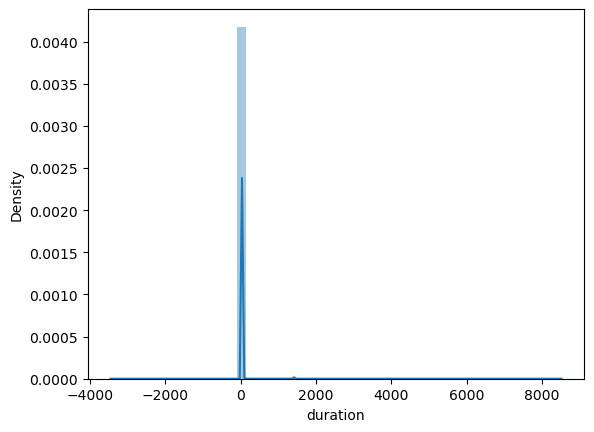

In [26]:
sns.distplot(df.duration)

In [27]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [36]:
new_row_count = len(df)
new_row_count

2421440

In [37]:
new_row_count/original_row_count

0.9827547930522406

### Question 4: Dimensionality after OHE
- 2
- 155
- 345
- 515 (Answer)
- 715

In [39]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [46]:
categorical = ['PULocationID','DOLocationID']
df[categorical] = df[categorical].fillna(-1).astype('str')

In [47]:
train_dicts = df[categorical].to_dict(orient='records')
train_dicts[:10]

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'}]

In [48]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [49]:
X_train.shape

(2421440, 515)

### Question 5: RMSE on train
- 6.99 (Answer)
- 11.99
- 16.99
- 21.99

In [66]:
target = 'duration'
y_train = df[target].values

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(X_train)

In [55]:
mean_squared_error(y_train, y_pred, squared=False)

6.986190836477672

### Create resuable function




In [56]:
categorical = ['PULocationID','DOLocationID']
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    #calc duration
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60
    
    #remove outliers
    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
        
    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

### Question 6: RMSE on validation
- 7.79 (Answer)
- 12.79
- 17.79
- 22.79


In [57]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet -P ./data/

--2023-05-21 15:10:03--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.32.192.116, 13.32.192.124, 13.32.192.190, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.32.192.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45616512 (44M) [application/x-www-form-urlencoded]
Saving to: ‘./data/yellow_tripdata_2022-02.parquet’

yellow_tripdata_202 100%[===================>]  43.50M  81.4MB/s    in 0.5s    

2023-05-21 15:10:04 (81.4 MB/s) - ‘./data/yellow_tripdata_2022-02.parquet’ saved [45616512/45616512]



In [61]:
df_val = read_dataframe('./data/yellow_tripdata_2022-02.parquet')

In [62]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [63]:
X_val = dv.transform(val_dicts)

In [64]:
y_pred = lr.predict(X_val)

In [67]:
y_val = df_val[target].values

In [68]:
mean_squared_error(y_val, y_pred, squared=False)

7.78640879016696